Author: Shaira Shafiquzzaman
Date: February 1st, 2026

Purpose: To demonstrate a functional connectivity pipeline using the resting state fMRI of a single subject, including loading fMRI data, extracting a time series, producing a correlation matrix, and visualizing the correlation matrix using a heatmap. 

Sources:

1. Project conception: "Tutorial on machine learning in functional MRI using Nilearn", MAIN conference YouTube Channel
2. Neuroimaging concepts: Publicly available videos explaining fMRI and atlas-based functional connectivity
3. Neuroimaging and computational concepts: Rokem, A., & Yarkoni, T. Neuroimaging and Data Science (chapters referenced: “Image Processing” — understanding images as NumPy arrays; “Reading Neuroimaging Data with NiBabel” — working with NIfTI files)
4. Nilearn.datasets.fetch_atlas_harvard_oxford documentation for importing atlas
5. Nilearn.image.load_img for loading NIfTI image from a file path
6. Nilearn.datasets.fetch_development_fmri documentation for importing fMRI data
7. Nilearn time series documentation ("Extracting time series to build a functional connectome") for creating time series 
8. NumPy documentation for creating correlation matrix
9. Matplotlib documentation for creating heatmap
10. Python documentation for inspecting data

Environment Requirements:

1. Python 3
2. Jupyter notebook
3. Required packages: NumPy, Matplotlib, Nilearn

In [2]:
#import python packages
#NumPy for creating correlation matrix; matplotlib for creating heatmap
#nilearn datasets for importing atlas/fmri data; nilearn maskers for creating time series 
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn.maskers import NiftiLabelsMasker

In [3]:
#load atlas from nilearn
#an atlas is used to define brain regions in fMRI data to compute average BOLD signal in each
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm') 

[fetch_atlas_harvard_oxford] Dataset found in C:\Users\shair\nilearn_data\fsl

In [4]:
#load resting state fMRI data for one subject
#data contains BOLD signal for each 3-D voxel over time
fmri_data = datasets.fetch_development_fmri(n_subjects = 1, age_group = "adult") 

[fetch_development_fmri] Dataset found in C:\Users\shair\nilearn_data\development_fmri

[fetch_development_fmri] Dataset found in C:\Users\shair\nilearn_data\development_fmri\development_fmri

[fetch_development_fmri] Dataset found in C:\Users\shair\nilearn_data\development_fmri\development_fmri

In [5]:
#use NiftiLabelsMasker to read atlas to define brain regions in fMRI data
masker = NiftiLabelsMasker(labels_img = atlas.maps, standardize = True)
#create a collection of time series representing each brain region, each showing average BOLD signal per time point  
time_series = masker.fit_transform(fmri_data.func[0])
#inspect time series structure to verify expected dimensions (timepoints x regions)
print(type(time_series))
print(time_series.shape)
print(time_series[:5, :5])

<class 'numpy.ndarray'>
(168, 48)
[[-0.44769299 -1.22932343 -1.47290081 -1.01317691 -1.918413  ]
 [-0.71769643 -1.63102371 -1.53773021 -1.4495703  -3.8024723 ]
 [-1.5128895  -2.03272398 -1.46641787 -1.5104624  -2.94391363]
 [-0.95971171 -1.19439297 -1.58311079 -1.80477422 -2.25229693]
 [-1.10953069 -1.12453206 -1.29786143 -0.90154139 -1.56068022]]
(48, 168)


In [6]:
#produce correlation matrix listing pairwise correlation between each time series
correlation_matrix_ts = np.corrcoef(time_series.T)
#inspect dimensions and some values of correlation matrix
print(correlation_matrix_ts.shape)
print(correlation_matrix_ts[:5, :5])

(48, 48)
[[1.         0.42665341 0.78759992 0.86616823 0.6581062 ]
 [0.42665341 1.         0.4702764  0.37867561 0.58750541]
 [0.78759992 0.4702764  1.         0.89697914 0.78517418]
 [0.86616823 0.37867561 0.89697914 1.         0.73670004]
 [0.6581062  0.58750541 0.78517418 0.73670004 1.        ]]


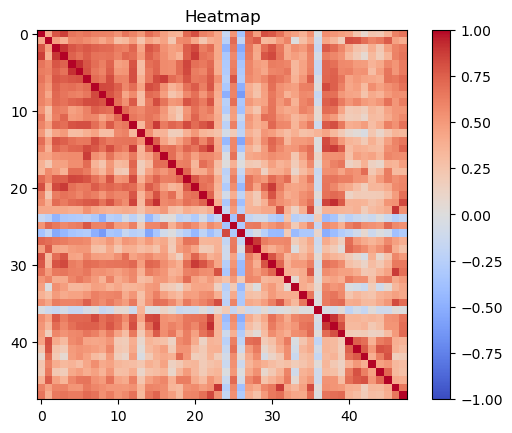

In [7]:
#visualize matrix using a heatmap
plt.imshow(correlation_matrix_ts, cmap = "coolwarm", vmin = -1, vmax = 1)
plt.title("Heatmap")
plt.colorbar()
plt.show()

Interpretation of Data:
The heatmap displays pairwise Pearson correlations between atlas-defined regional time series. Warmer colors (red) indicate stronger positive correlations, while cooler colors (blue) indicate negative correlations. Positive correlations reflect similar temporal fluctuations in BOLD signal between regions, whereas negative correlations indicate inverse temporal relationships.
Most region pairs exhibit weak correlations, with subsets of regions showing moderate positive correlations. This pattern is typical for resting-state fMRI, where different brain regions show varying levels of correlated activity.

Limitations: 
This analysis is based on correlation and does not imply causal relationships between regions. Additionally, the results reflect a single subject and limited preprocessing, which may influence observed connectivity patterns.

Future Directions:
1. Implement additional preprocessing steps (e.g. spatial normalization, smoothing, motion correction)
2. Extend the analysis to task-based fMRI data
3. Completing pipeline for multiple participants to assess group-level patterns
